In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import pandas as pd

# Load your dataset and split it into features (X) and target (y)
df = pd.read_csv("Cleaned.csv")
X = df.drop(['Grade'], axis=1)
y = df['Grade']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=10)
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Create a new Decision Tree classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Perform cross-validation with the best classifier
cv_scores = cross_val_score(best_dt, X, y, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.8592656339644291
Cross-Validation Scores: [0.85714286 0.85714286 0.85714286 0.82142857 0.89285714 0.82142857
 0.8452381  0.85714286 0.86746988 0.91566265]
Mean CV Score: 0.8592656339644291


In [9]:
from sklearn.metrics import f1_score, classification_report
model=best_dt
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8426966292134833
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       122
           1       0.83      0.85      0.84        88

    accuracy                           0.87       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.87      0.87      0.87       210



C:\Users\ajed8\AppData\Local\Temp\ipykernel_13948\570955108.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Grade'], 1))
C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


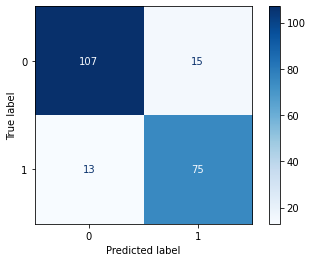

In [10]:
from sklearn.metrics import plot_confusion_matrix
X = np.array(df.drop(['Grade'], 1))
y = np.array(df['Grade'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


plot_confusion_matrix(best_dt, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

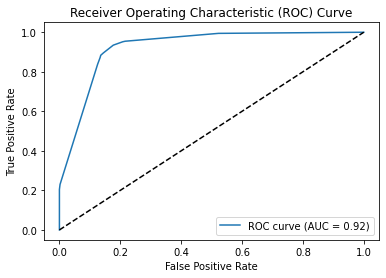

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = best_dt.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [12]:
import joblib

joblib.dump(best_dt, 'best_dt_model.pkl')

['best_dt_model.pkl']